In [21]:
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [23]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[['Age','Income($)']])

In [24]:
dbscan = DBSCAN(eps=0.2, min_samples=2) #Eps = raduis / min_samples = min_poinsts
y_predicted_dbscan = dbscan.fit_predict(X_scaled)
y_predicted_dbscan

array([ 0, -1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  2,
        2,  2,  2,  2,  2], dtype=int64)

In [25]:
df['DBSCAN_Cluster'] = y_predicted_dbscan
df

,Name,Age,Income($),DBSCAN_Cluster
0,Rob,27,70000,0
1,Michael,29,90000,-1
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


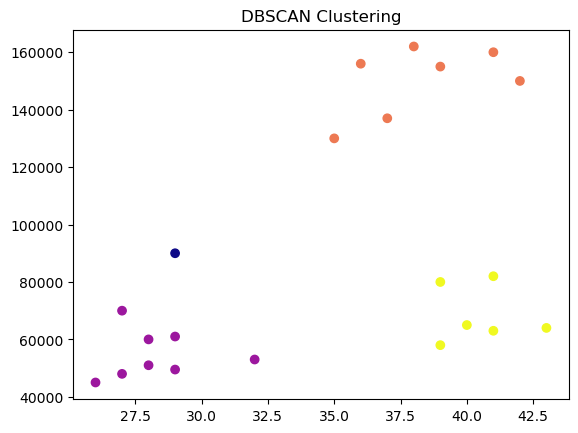

In [26]:
plt.scatter(df['Age'], df['Income($)'], c=df['DBSCAN_Cluster'], cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df[['Age','Income($)']], y_predicted_dbscan)

In [28]:
score

0.31053169240064793

In [29]:
import numpy as np

n_noise = np.sum(y_predicted_dbscan == -1)
print("Number of noise points:", n_noise)


Number of noise points: 1


In [14]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


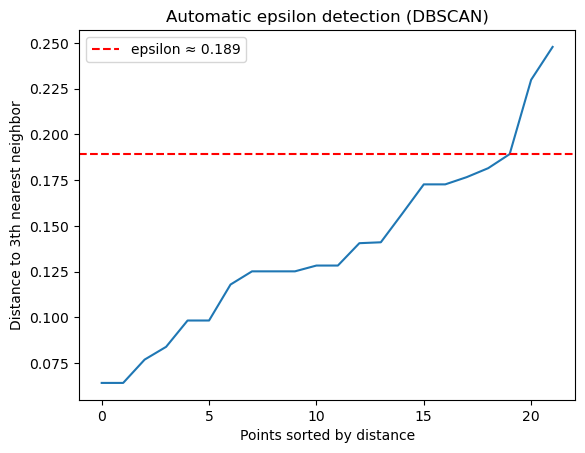

Suggested epsilon: 0.18925420798143303


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# X_scaled is your dataset
min_samples = 3
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# sort distances (to kth neighbor)
k_distances = np.sort(distances[:, min_samples - 1])

# detect the knee (elbow)
kneedle = KneeLocator(
    range(len(k_distances)), 
    k_distances, 
    curve="convex", 
    direction="increasing"
)

epsilon = k_distances[kneedle.knee]

# plot
plt.plot(k_distances)
plt.axhline(y=epsilon, color='r', linestyle='--', label=f"epsilon ≈ {epsilon:.3f}")
plt.ylabel(f"Distance to {min_samples}th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title("Automatic epsilon detection (DBSCAN)")
plt.legend()
plt.show()

print("Suggested epsilon:", epsilon)


In [31]:
dbscan = DBSCAN(eps=0.18925420798143303, min_samples=3) #Eps = raduis / min_samples = min_poinsts
y_predicted_dbscan2 = dbscan.fit_predict(X_scaled)
y_predicted_dbscan2

array([ 0, -1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  2,
        2,  2,  2,  2,  2], dtype=int64)

In [32]:
df['DBSCAN_Cluster2'] = y_predicted_dbscan
df

,Name,Age,Income($),DBSCAN_Cluster,DBSCAN_Cluster2
0,Rob,27,70000,0,0
1,Michael,29,90000,-1,-1
2,Mohan,29,61000,0,0
3,Ismail,28,60000,0,0
4,Kory,42,150000,1,1
5,Gautam,39,155000,1,1
6,David,41,160000,1,1
7,Andrea,38,162000,1,1
8,Brad,36,156000,1,1
9,Angelina,35,130000,1,1


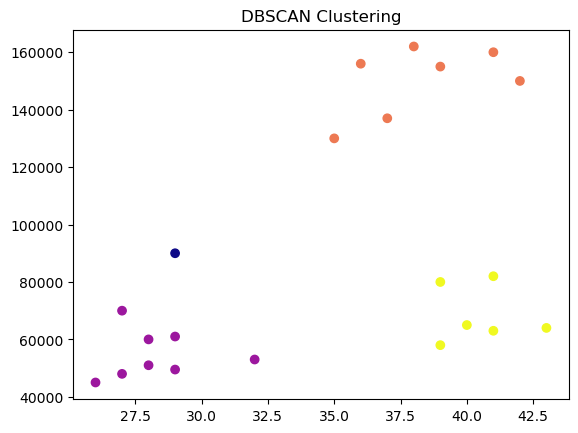

In [18]:
plt.scatter(df['Age'], df['Income($)'], c=df['DBSCAN_Cluster2'], cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()



In [35]:
!pip install hdbscan

  Obtaining dependency information for hdbscan from https://files.pythonhosted.org/packages/64/b1/96c347c7740efa1ac803be64155159284f92fafcff88c1077344e64eead5/hdbscan-0.8.40-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/732.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/732.2 kB ? eta -:--:--
   -- ------------------------------------ 41.0/732.2 kB 487.6 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/732.2 kB 573.4 kB/s eta 0:00:02
   ----- -------------------------------- 102.4/732.2 kB 535.8 kB/s eta 0:00:02
   ------ ------------------------------- 133.1/732.2 kB 602.4 kB/s eta 0:00:01
   -------- ----------------------------- 163.8/732.2 kB 577.4 kB/s eta 0:00:01
   ----------- -------------------------- 215.0/732.2 kB 654.3 kB/s eta 0:00:01
   -------------- ----------------------- 286.7/732.2 kB 768.0 kB/s eta 0:00:01
   ----------------- -------------------- 327.7/732.2 kB 780.0 kB/s eta 0:00:01
   -----

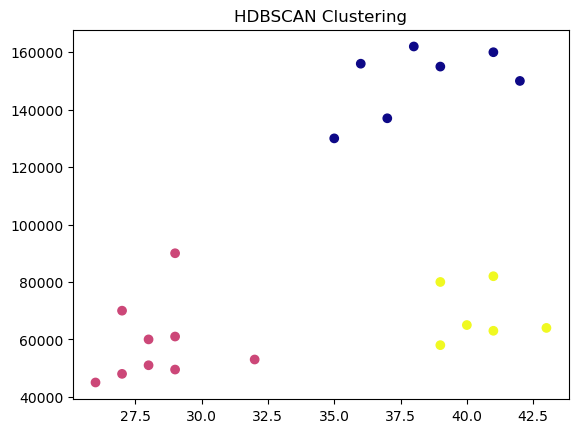

In [33]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(X_scaled)

plt.scatter(df['Age'], df['Income($)'], c=labels, cmap='plasma')
plt.title("HDBSCAN Clustering")
plt.show()
